# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html


### Primer integrante:
Nombre: Alejandro Castaño Rojas

### Segundo integrante:
Nombre: Angélica Arroyave Mendoza

In [12]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import hist, show


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

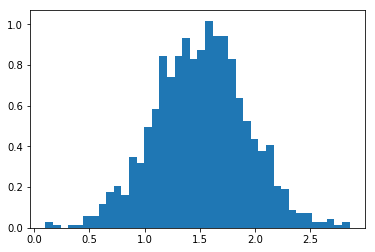

In [9]:
gaussiana1 = np.random.normal(0.9, 0.3, 1000)
gaussiana2 = np.random.normal(0.6, 0.3, 1000)

suma_gauss = gaussiana1 + gaussiana2

hist(suma_gauss,40, density = True)
plt.show()
plt.clf()

## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [13]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter


#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (carácteristicas)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]

Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

In [14]:
muestras, caracteristicas = X.shape
print('El número de muestras es: ', muestras)

El número de muestras es:  5000


2.2 ¿Cuántas características tiene el problema?:

In [15]:
print('El número de caracteristicas es: ', caracteristicas)

El número de caracteristicas es:  12


## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [24]:
import scipy as sc
import operator
from scipy.spatial import distance

def KNN_regression(X_train, Y_train, x_test, k):
    distances = []
    muestras, caracteristicas = X_train.shape
    for i in range(muestras):
        distances.append(distance.euclidean(X_train[i], x_test))
    aux_distances = distances.copy()
    aux_distances.sort()
    suma_y = 0
    for i in range(k):
        rel_pos = distances.index(aux_distances[i])
        suma_y += Y_train[rel_pos]
    prom_y = suma_y/k # Aquí ya tenemos el promedio :D
    return prom_y

def KNN(X_train, Y_train, X_test, k, tipo):
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida pra cada una de las muestras de entrenamiento
    
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    tipo = tipo
    
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Nt = len(X_test)
    Y_test = np.zeros(Nt)
    for i in range(Nt):
        Y_test[i] = KNN_regression(X_train, Y_train, X_test[i], k)
    
    print("Y_test -> " + str(Y_test.shape) + " | X_test -> " + str(X_test.shape))
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [18]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [28]:
from numpy import random
import math
from scipy import stats

k_s = [1,2,3,4,5,6,7,100]
for k in k_s:
    mape_s = []
    std_s = []
    N = np.size(X,0)
    
    #Entrenamiento y validación del modelo
    random.seed(1)
    Error = np.zeros(2)
    
    for j in range(2):
        
        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]
    
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
        #Complete con el llamado apropiado de la función que Uds diseñaron 
        #(X_train, Y_train, X_val, k, tipo)
        tipo = ""
        k = k
        Yest = KNN(Xtrain, Ytrain, Xtest, k, tipo)
        
        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)
    
    mape = np.mean(Error)
    std = np.std(Error)
    
    print('\nError durante la prueba k=' + str(k) + '| MAPE: ' +  str(mape) + ' | STD: +-' + str(std))
    mape_s.append(mape)
    std_s.append(std)

Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=1| MAPE: 0.384037299775 | STD: +-0.016497301274
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=2| MAPE: 0.363009501351 | STD: +-0.00614002436119
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=3| MAPE: 0.349742491357 | STD: +-0.00236012261541
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=4| MAPE: 0.34117124804 | STD: +-0.0045612020282
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=5| MAPE: 0.333651009959 | STD: +-0.00271028693353
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test -> (1500,) | X_test -> (1500, 12)

Error durante la prueba k=6| MAPE: 0.325285935596 | STD: +-0.00199284737945
Y_test -> (1500,) | X_test -> (1500, 12)
Y_test ->

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

La metodología de validación que se está utilizando es _Bootstrapping_, manteniendo una proporción de 70% - 30% (Entrenamiento - Validación respectivamente).

4.2 ¿Cuántas muestras se usan para el entrenamiento?

In [29]:
muestras_ent, caracteristicas = Xtrain.shape
muestras_ent

3500

4.3 ¿Cuántas muestras se usan para la validación?

In [30]:
muestras_test, caracteristicas = Xtest.shape
muestras_test

1500

#### Tabla de resultados

In [41]:
import pandas as pd
#!pip install qgrid
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100']),
    'Error_Prueba': pd.Series(['0.384037299775','0.363009501351','0.349742491357','0.34117124804','0.333651009959','0.325285935596','0.320110354275','0.26879661924']),
    'Desviación estándar del error': pd.Series(['0.016497301274','0.00614002436119','0.00236012261541','0.0045612020282','0.00271028693353','0.00199284737945','0.000797880201505','0.0053405441956'])
})
#df_types["Error_Prueba"] = pd.Series()
#df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
#df_types["Error_Prueba"][1] = "0.3630"
#df_types["Desviación estándar del error"][1] = "0.0061"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

A Jupyter Widget

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [42]:
qgrid_widget.get_changed_df()

,Desviación estándar del error,Error_Prueba
Numero de vecinos,,
1,0.016497301274,0.384037299775
2,0.00614002436119,0.363009501351
3,0.00236012261541,0.349742491357
4,0.0045612020282,0.34117124804
5,0.00271028693353,0.333651009959
6,0.00199284737945,0.325285935596
7,0.000797880201505,0.320110354275
100,0.0053405441956,0.26879661924


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [62]:
def distance_vectors(x, X):
   return np.linalg.norm(x - X)

def kernel_gaussiano(x):
   return (np.exp((-0.5)*x**2))

def U(x, X, h):
   return (distance_vectors(x, X)/h)


def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nt = X_train.shape[0]
    Nv = X_val.shape[0]
    Y_val = np.zeros(Nv)
    numerator = 0
    denominator = 0
    for i in range(Nv):
        for j in range(Nt):
            kernel = kernel_gaussiano(U(X_val[i,:], X_train[j,:], ancho_h))
            numerator = numerator +  kernel * Y_train[j]
            denominator = denominator + kernel
        Y_val[i] = (numerator/denominator)
       
       
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    return Y_val

In [ ]:
from numpy import random
import math
from scipy import stats
counter = 0
h_s = ['0.1', '0.9', '1', '2', '3', '5', '10']
for h in h_s:
    mape_s = []
    std_s = []
    for j in range(2):
        N = np.size(X,0)
        
        #Entrenamiento y validación del modelo
        random.seed(1)
        
        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]
        
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        #Complete con el llamado apropiado de la función que Uds diseñaron 
        h = float(h)
        Yest = Nadaraya_Watson(Xtrain, Ytrain, Xtest, h)
        counter += 1
        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)
    mape = np.mean(Error)
    std = np.std(Error)
    
    print('\nError durante la prueba h=' + str(h) + '| MAPE: ' +  str(mape) + ' | STD: +-' + str(std))
    mape_s.append(mape)
    std_s.append(std)
    print(Yest)



Error durante la prueba h=100| MAPE: 0.286441974123 | STD: +-0.0
[ 1.49678608  1.51349805  1.51349805 ...,  1.15799347  1.15799347
  1.15799347]

Error durante la prueba h=100| MAPE: 0.305842314376 | STD: +-0.0
[ 1.25632541  1.2479956   1.25250963 ...,  1.22617525  1.22621779
  1.22621526]


## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [98]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])
    'Error_Prueba': pd.Series(mape_s),
    'Desviación estándar del error': pd.Series(std_s)
})
#df_types2["Error_Prueba"] = ""
#df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
#df_types2["Error_Prueba"][1] = "0.3011"
#df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [99]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,,
0.9,0.3011,0.0031
1,,
2,,
3,,
5,,
10,,


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

6.2 ¿Cómo evito que se presente la excepción?: